In [18]:
# モジュールインポート
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from numpy import nan
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score)
import math

In [27]:
# 関数を用意した。
def read_titanic_train():
     return pd.read_csv("../datasets/titanic_train.csv")

def read_titanic_test():
        return pd.read_csv("../datasets/titanic_test.csv")
# read file関連を定義したものの正直関数にする必要はなかったと思いました。
    
def name2int(data):
    # 名前の敬称を元にnameに対応したintとして管理する。
    # WHY : 文字列だと分析する際に利用しにくいため、
    #このような感じで管理。 {'Mrs':0 , 'Miss':1, 'Mr':2,'Master':3, 'その他':4}
    name2int_ary = []
    for name in np.array(data.Name):
        separated_name  = name.split(',')[1]
        if 'Mrs' in separated_name:
            name2int_ary.append(0)
        elif 'Miss' in separated_name:
            name2int_ary.append(1)
        elif 'Mr' in separated_name:
            name2int_ary.append(2)
        elif 'Master' in separated_name:
            name2int_ary.append(3)
        else:
            name2int_ary.append(4)
    data['name2int'] = name2int_ary
    data = data.drop(['Name'],axis=1)        
    return data
# name2int_ary[0:len(name2int_ary)]

# name2intで分類分けした各敬称の年齢の平均の計算用メソッド
##  //// df[df.Name.str.contains("Mr.")].Age.mean()
## とすることで、 Mrの年齢を計算できる。（このメソッド不要だった説。。。作ったので使ってますw）
def avg_name2int(loc, df):
    sum_age = 0
    length = 0
    for age in np.array(df[df['name2int' ]== loc].iloc[:,0:len( np.array(df['name2int']))]['Age']):
        if not math.isnan(age):
             sum_age += age
             length += 1
    avg = sum_age / length
    return  round(avg , 0) 


def x(age_ary, df):
    for i, num in enumerate(age_ary):
        if math.isnan(num):
            if df.iloc[i].name2int == 0:
                df.at[i,'Age'] =  avg_name2int(0,df)
            elif df.iloc[i].name2int == 1:
                df.at[i,'Age'] =  avg_name2int(1,df)
            elif df.iloc[i].name2int == 2:
                df.at[i,'Age'] =  avg_name2int(2,df)
            elif df.iloc[i].name2int == 3:
                df.at[i,'Age'] =  avg_name2int(3,df)
            elif df.iloc[i].name2int == 4:
                df.at[i,'Age'] =  avg_name2int(4,df)
            else: 
                df.at[i,'Age'] = df['Age'].median()


In [28]:
df = read_titanic_train()
#いくつかのカラムを削除。
df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
# df = df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

#文字で格納されているデータを数値へ変換
df.Embarked = df.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
## Cherbourg: 0 , Queenstown, : 1 , Southampton: 2

df.Sex = df.Sex.replace(['male', 'female'], [0, 1])

df['Fare'] = df['Fare'].fillna(df['Fare'].median())

# df['Age'] = df['Age'].fillna(df['Age'].median())
name2int(df)

age_ary =  np.array(df.Age)[0:len( np.array(df.Age))]

embed_age(age_ary, df)
df = df.drop(['Name'],axis=1)


##==================================
##          分析。
##==================================
# train dataをもとにホールドアウト法にて分割
train_X = df.drop('Survived', axis=1)
train_y = df.Survived
(train_X, test_X ,train_y, test_y) = train_test_split(train_X, train_y, test_size = 0.3, random_state = 666)
train_X = train_X.values.astype(np.int64)
test_X = test_X.values.astype(np.int64)

## ランダムフォレストでやった。
clf = RandomForestClassifier(random_state=0)
clf = clf.fit(train_X, train_y)
pred = clf.predict(test_X)
fpr, tpr, thresholds = roc_curve(test_y, pred, pos_label=1)
auc(fpr, tpr)
accuracy_score(pred, test_y)

0.83582089552238803

In [ ]:
##TODO  && think about : 他のパラメータの調整。もしくは学習方法を変えないと上がらなそう。

In [ ]:
 ## in feature : kaggleで検証したい、

In [5]:
###########################################
#
#     検証用のグラフとか。メモ残し。
#     検証してた際の　logはtaitanic_thinking_ideas.ipynbに入ってます。
#     ここから先はこのアプリ作成でのメモ書きレベルの検証
#
###########################################

In [30]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name2int
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,889.000000,891.000000
mean,0.383838,2.308642,0.352413,29.719607,0.523008,0.381594,32.204208,0.897638,1.607183
std,0.486592,0.836071,0.477990,13.261087,1.102743,0.806057,49.693429,0.515181,0.883376
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000
50%,0.000000,3.000000,0.000000,30.000000,0.000000,0.000000,14.454200,1.000000,2.000000
75%,1.000000,3.000000,1.000000,36.000000,1.000000,0.000000,31.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,4.000000


In [31]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name2int
0,0,3,0,22.0,1,0,7.2500,1.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,0
2,1,3,1,26.0,0,0,7.9250,1.0,1
3,1,1,1,35.0,1,0,53.1000,1.0,0
4,0,3,0,35.0,0,0,8.0500,1.0,2


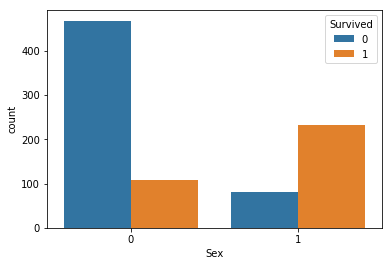

In [32]:
# 性別と、生死の関係？
sns.countplot('Sex',hue='Survived',data=df)

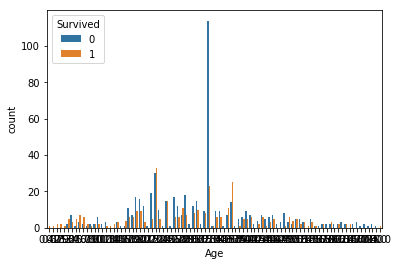

In [33]:
# 年齢と、生死の関係？
sns.countplot('Age',hue='Survived',data=df)

In [34]:
##################################################

In [35]:
df2 = read_titanic_train()
#いくつかのカラムを削除。
df2.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)
df2.Embarked = df2.Embarked.replace(['C', 'S', 'Q'], [0, 1, 2])
df2.Sex = df2.Sex.replace(['male', 'female'], [0, 1])
df2['Fare'] = df2['Fare'].fillna(df2['Fare'].median())
df2= name2int(df2)

In [36]:
df2.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name2int
0,0,3,0,22.0,1,0,7.2500,1.0,2
1,1,1,1,38.0,1,0,71.2833,0.0,0
2,1,3,1,26.0,0,0,7.9250,1.0,1
3,1,1,1,35.0,1,0,53.1000,1.0,0
4,0,3,0,35.0,0,0,8.0500,1.0,2
5,0,3,0,NaN,0,0,8.4583,2.0,2
6,0,1,0,54.0,0,0,51.8625,1.0,2
7,0,3,0,2.0,3,1,21.0750,1.0,3
8,1,3,1,27.0,0,2,11.1333,1.0,0
9,1,2,1,14.0,1,0,30.0708,0.0,0


In [37]:
df2['name2int'].head()

0    2
1    0
2    1
3    0
4    2
Name: name2int, dtype: int64

In [40]:
df2.where(df2['name2int'] == 1).head(30)
# df2.where(df2['name2int'] == 1).head(50)
# df2.where(df2['name2int'] == 1).head(100)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,name2int
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,3.0,1.0,26.0,0.0,0.0,7.9250,1.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
print(avg_name2int(0,df2))
print(avg_name2int(1,df2))
print(avg_name2int(2,df2))
print(avg_name2int(3,df2))
print(avg_name2int(4,df2))


36.0
22.0
32.0
5.0
43.0
